### mlClassification : MNIST 의류 이미지 분류
> 학습내용 : 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련

- 상세 내용을 모두 이해하지 못하더라도, TensorFlow2.x에서 동작하는 프로그램을 빠르게 살펴 보겠습니다.
- 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 tf.keras를 사용

In [1]:
# TensorFlow2.x and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.9.1'

### 패션 MNIST 데이터셋 임포트하기
- 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용
- 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다.

- 학습 : 60,000개의 이미지를 사용하여 네트워크를 훈련하고
- 평가 : 10,000개의 이미지를 사용하여 네트워크에서 이미지 분류를 학습한 정도를 평가
- Data : TensorFlow에서 직접 Fashion MNIST 데이터에 액세스하여 가져오고 로딩

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
type(train_images), type(train_labels), type(test_images), type(test_labels)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [4]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환 :

- train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트 이고,
- test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트 이다.
- 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다.
- 레이블(label)은 0에서 9까지의 정수 배열입니다. → 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:
레이블	클래스
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
- 각 이미지는 하나의 레이블에 매핑되어 있습니다.
- 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다

In [5]:
class_names = ['T-shirt/top',  'Trouser',  'Pullover',  'Dress', 'Coat',
               'Sandal',       'Shirt',    'Sneaker',   'Bag',   'Ankle boot' ]

### 데이터 탐색
> 모델을 훈련하기 전에 데이터셋 구조를 파악한다.

훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
sorted(set(train_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

### 데이터 전처리
> 네트워크를 훈련하기 전에 데이터를 전처리해야 합니다.

훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

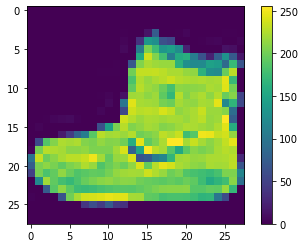

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정한다

- 이렇게 하려면 255로 나누어야 합니다.
- 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다.

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

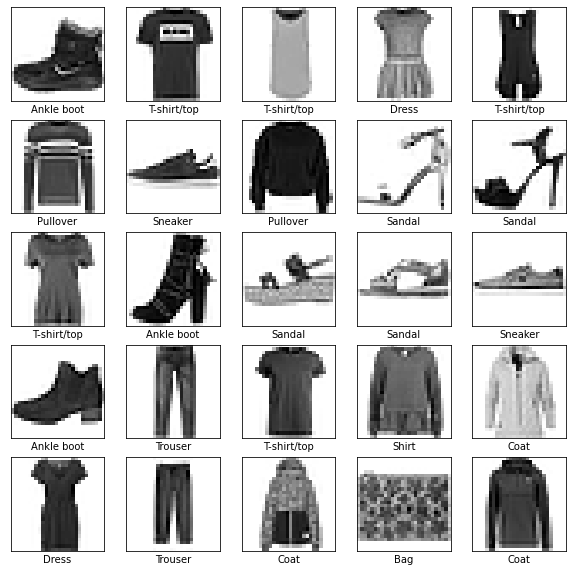

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])    # 분류 라벨명
plt.show()

### 모델 구성
> 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

### 층 설정
>신경망의 기본 빌딩 블록은 레이어 입니다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. 이러한 표현은 당면한 문제에 의미가 있어야 합니다.

>대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- 이 네트워크의 첫 번째 층인 tf.keras.layers.Flatten은 2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환합니다. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 합니다.

- 픽셀을 펼친 후에는 두 개의 tf.keras.layers.Dense 층이 연속되어 연결됩니다. 이 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부릅니다. 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가집니다. 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층입니다. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

### 모델 컴파일
> 모델을 훈련할 준비가 되기 전에 몇 가지 설정이 더 필요합니다. 다음은 모델의 컴파일 단계에서 추가됩니다.

- 손실 함수 : 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
- 옵티마이저 : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
- 메트릭 : 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다.
→ 지금 예제에서는 올바르게 분류된 이미지의 비율인 *정확도(accuracy)* 를 사용합니다.

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 모델 훈련
> 신경망 모델을 훈련하려면 다음 단계가 필요합니다.

- 훈련 데이터를 모델에 주입합니다. → train_images와 train_labels 배열
- 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
- 테스트 세트에 대한 모델의 예측을 만듭니다 → test_images 배열
- 예측이 test_labels 배열의 레이블과 일치하는지 확인합니다.

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4990 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3727 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3356 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3116 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2781 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2552 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2455 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.237

- 모델이 훈련되면서 손실과 정확도 지표가 출력됩니다.
- epochs=10이라면, 전체 데이터를 10번 사행해서 학습을 거치는 것입니다.
- 우리는 모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있습니다.
- epoch 값이 너무 작다면 underfitting이, 너무 크다면 overfitting이 발생할 확률이 높습니다.

### 정확도 평가
- 다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다.

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3353 - accuracy: 0.8837 - 300ms/epoch - 959us/step

Test accuracy: 0.8837000131607056


### 예측하기
> 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다.

모델의 선형 출력, 로짓. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.

In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 905us/step


In [23]:
predictions[0]

array([2.0395782e-06, 7.2263129e-10, 5.8173339e-07, 1.0840783e-09,
       3.9959668e-06, 8.3738216e-04, 4.9753285e-06, 1.2236367e-02,
       9.4973602e-06, 9.8690516e-01], dtype=float32)

In [26]:
# 이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.
# → 가장 높은 신뢰도를 가진 레이블은?
np.argmax(predictions[0])

9

In [27]:
# 모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다.
# 이 값이 맞는지 테스트 레이블을 확인해 본다.
test_labels[0]

9

In [28]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                   100*np.max(predictions_array),
                                   class_names[true_label]),
                                   color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### 예측 확인
> 훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다.

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

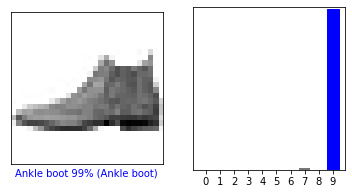

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

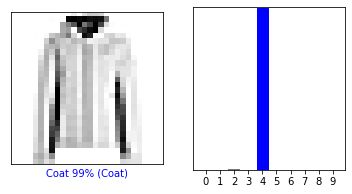

In [30]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

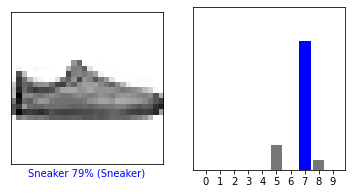

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

#### 몇 개의 이미지의 예측을 출력해 봅니다.

- 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다.
- 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

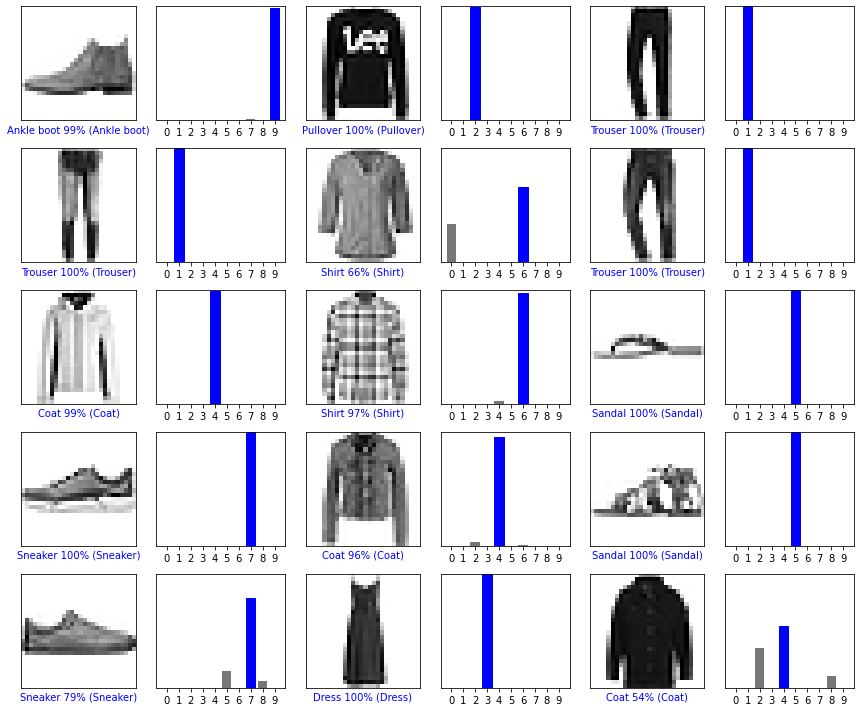

In [32]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기
>마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [33]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [34]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [36]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 11ms/step
[[8.5546626e-06 1.7758199e-10 9.9802870e-01 2.6422077e-13 1.9083384e-03
  2.8839250e-10 5.4374545e-05 1.1555256e-18 3.9614698e-10 7.4185135e-13]]


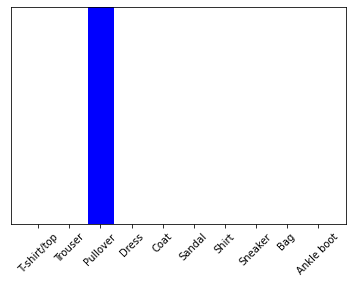

In [37]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [38]:
pred_idx = np.argmax(predictions_single[0])
pred_idx

2

In [39]:
class_names[pred_idx]

'Pullover'